<a href="https://colab.research.google.com/github/Anannya233/basic-study/blob/master/FasterRCNN_Fruits_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1- Mount Google Drive.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Step 2- Download TensorFlow Model Garden.

#cd into the TensorFlow directory in your Google Drive
%cd '/content/gdrive/My Drive/FasterRCNN'

/content/gdrive/My Drive/FasterRCNN


In [ ]:
#Step 3- Install some required libraries and tools.

!apt-get install protobuf-compiler python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  python-pil-doc python-pil-dbg
The following NEW packages will be installed:
  python-olefile python-pil
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 335 kB of archives.
After this operation, 1,666 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-olefile all 0.45.1-1 [33.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 python-pil amd64 5.1.0-1ubuntu0.5 [302 kB]
Fetched 335 kB in 1s (590 kB/s)
Selecting previously unselected package python-olefile.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../python-olefile_0.45.1

In [ ]:
#Step 4- Compile the Protobuf libraries.

#cd into 'TensorFlow/models/research'
%cd '/content/gdrive/My Drive/FasterRCNN/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/FasterRCNN/models/research


In [ ]:
#Step 5- Set the environment.

import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/FasterRCNN/models"
sys.path.append("/content/gdrive/My Drive/FasterRCNN/models/research")

In [ ]:
#Step 6- Build and Install setup.py.

!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/fpn_pb2.py -> build/lib/object_detection/

In [ ]:
#Step 9-

#cd into training_demo
%cd '/content/gdrive/My Drive/FasterRCNN/workspace/training_demo'


/content/gdrive/My Drive/FasterRCNN/workspace/training_demo


In [ ]:
#Step 12- Test the Model.

#Loading the saved_model
import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/FasterRCNN/workspace/training_demo/exported-models/fruits_model/saved_model"

print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [ ]:
#Step 13- Testing the Model.

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/My Drive/FasterRCNN/workspace/training_demo/exported-models/fruits_model/label_map.pbtxt",use_display_name=True)

#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

In [ ]:
#Step 14- Testing the Model.

#Loading the image
img=['/content/gdrive/My Drive/fruits2.jpg']
print(img)

#list containing paths of all the images

['/content/gdrive/My Drive/fruits2.jpg']


Running inference for /content/gdrive/My Drive/fruits2.jpg... Done


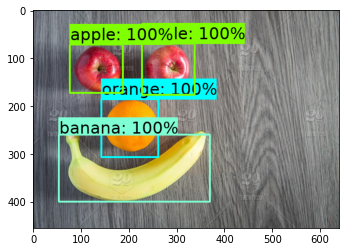

In [ ]:
#Step 20- Running the Inference.

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()
    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor=tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor=input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections=detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections

    # detection_classes should be ints.
    detections['detection_classes']=detections['detection_classes'].astype(np.int64)

    image_np_with_detections=image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          agnostic_mode=False)
    %matplotlib inline
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()

Acknowledgements:

Huge Thanks to [Lyudmil Vladimirov](http://pcwww.liv.ac.uk/~sglvladi/) for allowing me to use some of the content from their amazing [TensorFlow 2 Object Detection API](https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/index.html) for Local Machines!

Link to their [GitHub Repository](https://github.com/sglvladi/TensorFlowObjectDetectionTutorial).